# Diabetes data and Linear Regression

## Data preparation

In [1]:
# Load libraries and data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2021)
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

List of features
* age
* sex
* bmi
* bp
* serum : S1, S2, S3, S4, S5, S6

In [2]:
# Check features
diabetes["feature_names"]

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [3]:
# Load data and target
data, target = diabetes["data"], diabetes["target"]
df = pd.DataFrame(data, columns=diabetes["feature_names"])

# splite data
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split( data, target, test_size=0.3 )

## Multivariate Regression

In [4]:
# Load lib and fit
from sklearn.linear_model import LinearRegression

multi_reg = LinearRegression()
multi_reg.fit( train_data, train_target )

LinearRegression()

In [5]:
# check result
print(" the intersept is : ", multi_reg.intercept_, ", and coef are : ", multi_reg.coef_ )

 the intersept is :  147.71530303884637 , and coef are :  [  15.28599281 -218.58712324  545.20615241  263.65454602 -582.66260041
  317.3383627    48.53069352  215.50600894  655.7983492    64.04235961]


In [6]:
# prediction and evaluation

multi_train_pred = multi_reg.predict(train_data)
multi_test_pred = multi_reg.predict(test_data)

from sklearn.metrics import mean_squared_error
multi_train_mse = mean_squared_error( multi_train_pred, train_target )
multi_test_mse = mean_squared_error( multi_test_pred, test_target )

print(f"Multi Reg train MSE is {multi_train_mse:.4f}")
print(f"Multi Reg test MSE is {multi_test_mse:.4f}")

Multi Reg train MSE is 3034.2645
Multi Reg test MSE is 2562.2854


## Ridge Regression

In [7]:
# Load lib and fit

from sklearn.linear_model import Ridge

ridge_reg = Ridge()
ridge_reg.fit(train_data, train_target)

Ridge()

In [8]:
# check result
print(" the intersept is : ", ridge_reg.intercept_, ", and coef are : ", ridge_reg.coef_ )

 the intersept is :  147.74061450530152 , and coef are :  [  46.89226086  -55.63948731  270.71853113  158.68718579   23.59459607
  -11.1299402  -130.05904435  122.00257154  225.92053036  107.08779377]


In [9]:
# prediction and evaluation

ridge_train_pred = ridge_reg.predict(train_data)
ridge_test_pred = ridge_reg.predict(test_data)

ridge_train_mse = mean_squared_error( ridge_train_pred, train_target )
ridge_test_mse = mean_squared_error( ridge_test_pred, test_target )

print(f"Ridge Reg train MSE is {ridge_train_mse:.4f}")
print(f"Ridge Reg test MSE is {ridge_test_mse:.4f}")

Ridge Reg train MSE is 3556.2027
Ridge Reg test MSE is 3200.4045


## Lasso Regression

In [10]:
# Load lib and fit

from sklearn.linear_model import Lasso

lasso_reg = Lasso()
lasso_reg.fit(train_data, train_target)

Lasso()

In [11]:
# prediction and evaluation

lasso_train_pred = lasso_reg.predict(train_data)
lasso_test_pred = lasso_reg.predict(test_data)

lasso_train_mse = mean_squared_error( lasso_train_pred, train_target )
lasso_test_mse = mean_squared_error( lasso_test_pred, test_target )

print(f"Lasso Reg train MSE is {lasso_train_mse:.4f}")
print(f"Lasso Reg test MSE is {lasso_test_mse:.4f}")

Lasso Reg train MSE is 3897.9552
Lasso Reg test MSE is 3581.6776


In [12]:
## Summary

In [13]:
print(f"Multi Reg test MSE is {multi_test_mse:.4f}")
print(f"Ridge Reg test MSE is {ridge_test_mse:.4f}")
print(f"Lasso Reg test MSE is {lasso_test_mse:.4f}")

Multi Reg test MSE is 2562.2854
Ridge Reg test MSE is 3200.4045
Lasso Reg test MSE is 3581.6776


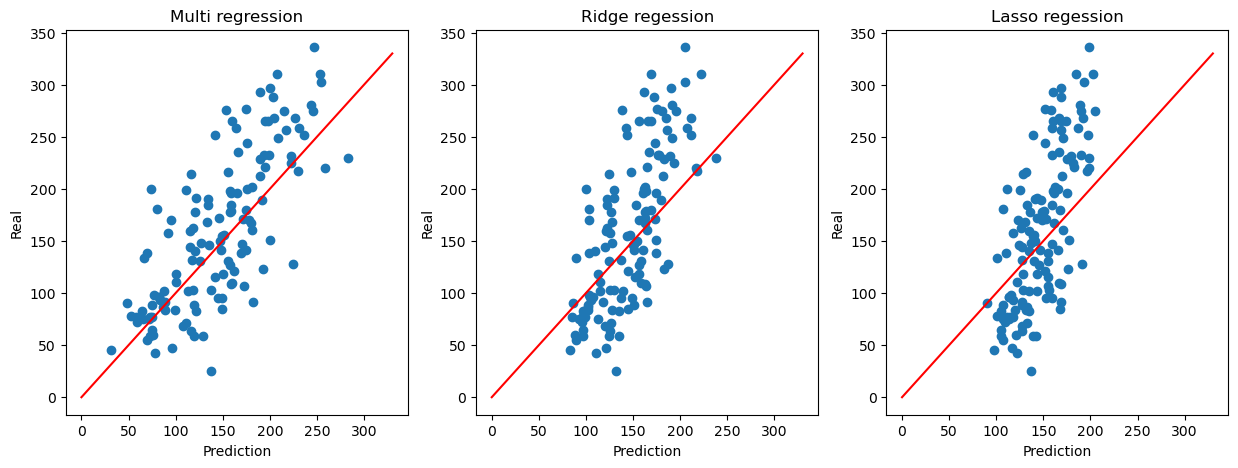

In [14]:
# plot the result
fig, axes = plt.subplots( nrows=1, ncols=3, figsize=(15, 5))

preds = [ ("Multi regression", multi_test_pred),
         ("Ridge regession", ridge_test_pred),
         ("Lasso regession", lasso_test_pred),
        ]

for idx, (name, test_pred) in enumerate(preds) :
    ax = axes[idx]
    ax.scatter( test_pred, test_target )
    ax.plot( np.linspace( 0, 330, 100), np.linspace(0, 330, 100), color="red" )
    ax.set_xlabel("Prediction")
    ax.set_ylabel("Real")
    ax.set_title(name)